# Intro to Buisness Analytics Projection Project
* Team members include:
    * Fróði - s232402
    * Guðmundur - s233365
    * Guðrún - s223284
    * Hrannar - s222536
    * Kristján - s232738
    

In this challenge we aim to discover ways to better manage demand and supply of a bike-sharing company opperating in New York using data science and ML skills. The company is one of the biggest station-based bike-sharing systems in the United States!

Firstly, we will be designing a predictive model that's supposed to predict the demand for the bike-sharing system (number of dropoffs and pickups) and thus giving an estimate for the supply, that is to ensure that, over the duration of the next day, there will never be a shortage of bikes – or, if there is, the goal is to minimize the number of bikes in deficit.

Secondly, we will be doing an exploratory analysis of the data, trying to find extensions of the dataset that could help us in making a better prediction model and discovering new and perhaps more relevant features.

Begin by import packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Import data and print head

In [2]:
data = pd.read_csv("Trips_2018.csv")
data.head()

,Unnamed: 0,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender
0,0,970,2018-01-01 13:50:57.4340,2018-01-01 14:07:08.1860,72.0,40.767272,-73.993929,505.0,40.749013,-73.988484,31956,Subscriber,1992,1
1,1,723,2018-01-01 15:33:30.1820,2018-01-01 15:45:33.3410,72.0,40.767272,-73.993929,3255.0,40.750585,-73.994685,32536,Subscriber,1969,1
2,2,496,2018-01-01 15:39:18.3370,2018-01-01 15:47:35.1720,72.0,40.767272,-73.993929,525.0,40.755942,-74.002116,16069,Subscriber,1956,1
3,3,306,2018-01-01 15:40:13.3720,2018-01-01 15:45:20.1910,72.0,40.767272,-73.993929,447.0,40.763707,-73.985162,31781,Subscriber,1974,1
4,4,306,2018-01-01 18:14:51.5680,2018-01-01 18:19:57.6420,72.0,40.767272,-73.993929,3356.0,40.774667,-73.984706,30319,Subscriber,1992,1


## Data treatment including:
* fix datetime objects
* dummy variable for subscriber 
* have first column as index, drop Unnamed 0 and S
    


In [6]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

#data = data.drop('Unnamed: 0', axis=1)
data['starttime'] = pd.to_datetime(data['starttime'], format="%Y-%m-%d %H:%M:%S.%f")
data['stoptime'] = pd.to_datetime(data['stoptime'], format="%Y-%m-%d %H:%M:%S.%f")
data['Suberscriber_type'] = label_encoder.fit_transform(data['usertype'])


#data = data[:100]
data

,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender,Suberscriber_type
0,970,2018-01-01 13:50:57.434,2018-01-01 14:07:08.186,72.0,40.767272,-73.993929,505.0,40.749013,-73.988484,31956,Subscriber,1992,1,1
1,723,2018-01-01 15:33:30.182,2018-01-01 15:45:33.341,72.0,40.767272,-73.993929,3255.0,40.750585,-73.994685,32536,Subscriber,1969,1,1
2,496,2018-01-01 15:39:18.337,2018-01-01 15:47:35.172,72.0,40.767272,-73.993929,525.0,40.755942,-74.002116,16069,Subscriber,1956,1,1
3,306,2018-01-01 15:40:13.372,2018-01-01 15:45:20.191,72.0,40.767272,-73.993929,447.0,40.763707,-73.985162,31781,Subscriber,1974,1,1
4,306,2018-01-01 18:14:51.568,2018-01-01 18:19:57.642,72.0,40.767272,-73.993929,3356.0,40.774667,-73.984706,30319,Subscriber,1992,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,476,2018-01-03 18:47:45.836,2018-01-03 18:55:42.692,72.0,40.767272,-73.993929,468.0,40.765265,-73.981923,19689,Subscriber,1980,1,1
96,1161,2018-01-03 19:01:00.054,2018-01-03 19:20:21.510,72.0,40.767272,-73.993929,379.0,40.749156,-73.991600,15392,Subscriber,1982,1,1
97,1318,2018-01-03 19:05:54.723,2018-01-03 19:27:53.523,72.0,40.767272,-73.993929,3323.0,40.798186,-73.960591,30235,Subscriber,1989,1,1
98,1279,2018-01-03 19:48:57.614,2018-01-03 20:10:17.539,72.0,40.767272,-73.993929,507.0,40.739126,-73.979738,26708,Subscriber,1966,1,1


Let's drop usertype and check data types

In [9]:
data = data.drop('usertype', axis=1)
data.dtypes

tripduration                        int64
starttime                  datetime64[ns]
stoptime                   datetime64[ns]
start_station_id                  float64
start_station_latitude            float64
start_station_longitude           float64
end_station_id                    float64
end_station_latitude              float64
end_station_longitude             float64
bikeid                              int64
birth_year                          int64
gender                              int64
Suberscriber_type                   int64
dtype: object

Dropping NaN Startstation id's

In [10]:
data.dropna(subset=['start_station_id'],inplace=True)
data


,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,birth_year,gender,Suberscriber_type
0,970,2018-01-01 13:50:57.434,2018-01-01 14:07:08.186,72.0,40.767272,-73.993929,505.0,40.749013,-73.988484,31956,1992,1,1
1,723,2018-01-01 15:33:30.182,2018-01-01 15:45:33.341,72.0,40.767272,-73.993929,3255.0,40.750585,-73.994685,32536,1969,1,1
2,496,2018-01-01 15:39:18.337,2018-01-01 15:47:35.172,72.0,40.767272,-73.993929,525.0,40.755942,-74.002116,16069,1956,1,1
3,306,2018-01-01 15:40:13.372,2018-01-01 15:45:20.191,72.0,40.767272,-73.993929,447.0,40.763707,-73.985162,31781,1974,1,1
4,306,2018-01-01 18:14:51.568,2018-01-01 18:19:57.642,72.0,40.767272,-73.993929,3356.0,40.774667,-73.984706,30319,1992,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,476,2018-01-03 18:47:45.836,2018-01-03 18:55:42.692,72.0,40.767272,-73.993929,468.0,40.765265,-73.981923,19689,1980,1,1
96,1161,2018-01-03 19:01:00.054,2018-01-03 19:20:21.510,72.0,40.767272,-73.993929,379.0,40.749156,-73.991600,15392,1982,1,1
97,1318,2018-01-03 19:05:54.723,2018-01-03 19:27:53.523,72.0,40.767272,-73.993929,3323.0,40.798186,-73.960591,30235,1989,1,1
98,1279,2018-01-03 19:48:57.614,2018-01-03 20:10:17.539,72.0,40.767272,-73.993929,507.0,40.739126,-73.979738,26708,1966,1,1


Let's create a new dataframe with Longitude and Latitude values

In [11]:
kmeans_df = data[['start_station_latitude', 'start_station_longitude']]
df_length = len(kmeans_df)
kmeans_df

,start_station_latitude,start_station_longitude
0,40.767272,-73.993929
1,40.767272,-73.993929
2,40.767272,-73.993929
3,40.767272,-73.993929
4,40.767272,-73.993929
...,...,...
95,40.767272,-73.993929
96,40.767272,-73.993929
97,40.767272,-73.993929
98,40.767272,-73.993929


Let's import kmeans algorithm and cluster the station spatially

In [12]:
from sklearn.cluster import KMeans

K=20
k=KMeans(K)

k.fit(kmeans_df)

/Users/frodibrooks/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/frodibrooks/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (20). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


KMeans(n_clusters=20)

Lets add the clusters to our original Dataframe

In [13]:
# bætum clusters við df
data['clusters'] = k.fit_predict(kmeans_df)
data.head()

/Users/frodibrooks/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/frodibrooks/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (20). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,birth_year,gender,Suberscriber_type,clusters
0,970,2018-01-01 13:50:57.434,2018-01-01 14:07:08.186,72.0,40.767272,-73.993929,505.0,40.749013,-73.988484,31956,1992,1,1,0
1,723,2018-01-01 15:33:30.182,2018-01-01 15:45:33.341,72.0,40.767272,-73.993929,3255.0,40.750585,-73.994685,32536,1969,1,1,0
2,496,2018-01-01 15:39:18.337,2018-01-01 15:47:35.172,72.0,40.767272,-73.993929,525.0,40.755942,-74.002116,16069,1956,1,1,0
3,306,2018-01-01 15:40:13.372,2018-01-01 15:45:20.191,72.0,40.767272,-73.993929,447.0,40.763707,-73.985162,31781,1974,1,1,0
4,306,2018-01-01 18:14:51.568,2018-01-01 18:19:57.642,72.0,40.767272,-73.993929,3356.0,40.774667,-73.984706,30319,1992,1,1,0


To be certain let´s check if the type of the dates

In [14]:
times = data['starttime']
times

0    2018-01-01 13:50:57.434
1    2018-01-01 15:33:30.182
2    2018-01-01 15:39:18.337
3    2018-01-01 15:40:13.372
4    2018-01-01 18:14:51.568
               ...          
95   2018-01-03 18:47:45.836
96   2018-01-03 19:01:00.054
97   2018-01-03 19:05:54.723
98   2018-01-03 19:48:57.614
99   2018-01-03 20:05:19.343
Name: starttime, Length: 100, dtype: datetime64[ns]

Lets check the distribution of the clusters

(array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 100.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
 array([-0.5 , -0.45, -0.4 , -0.35, -0.3 , -0.25, -0.2 , -0.15, -0.1 ,
        -0.05,  0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35,
         0.4 ,  0.45,  0.5 ]),
 <BarContainer object of 20 artists>)

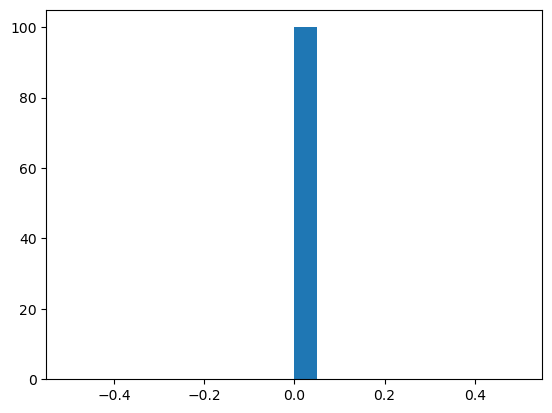

In [15]:
plt.hist(data['clusters'],bins=20)

Let's creata a scatter plot where each station has it's own color

In [19]:
latitude = data['start_station_latitude'].values
longitude = data['start_station_longitude'].values
clusters = data['clusters'].values

# Initialize empty lists to store filtered latitude and longitude
filtered_latitude = []
filtered_longitude = []
filtered_clusters = []

# Filter the data based on your conditions
for i in range(len(latitude)):
    if 37 <= latitude[i] <= 43 and -76 <= longitude[i] <= -72.6:
        filtered_latitude.append(latitude[i])
        filtered_longitude.append(longitude[i])
        filtered_clusters.append(clusters[i])

# Convert the lists to NumPy arrays
filtered_latitude = np.array(filtered_latitude)
filtered_longitude = np.array(filtered_longitude)

cmap = plt.get_cmap('viridis')  # You can choose a different colormap

NameError: name 'scatter' is not defined

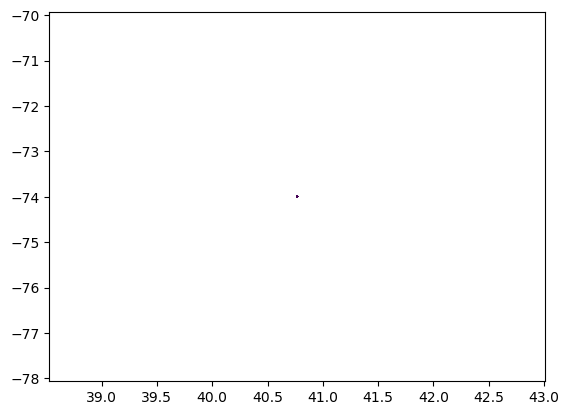

In [20]:
plt.scatter(filtered_latitude, filtered_longitude, c=filtered_clusters, cmap=cmap, marker='o',s=0.2)

# Add a colorbar to the plot to show cluster values and colors
plt.colorbar(scatter, label='Clusters')

# Add labels and a title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot of Latitude and Longitude with Cluster Colors')

# Show the plot
plt.show()

In [21]:
pickups = data['starttime']
pickups.dtypes
pickups

0    2018-01-01 13:50:57.434
1    2018-01-01 15:33:30.182
2    2018-01-01 15:39:18.337
3    2018-01-01 15:40:13.372
4    2018-01-01 18:14:51.568
               ...          
95   2018-01-03 18:47:45.836
96   2018-01-03 19:01:00.054
97   2018-01-03 19:05:54.723
98   2018-01-03 19:48:57.614
99   2018-01-03 20:05:19.343
Name: starttime, Length: 100, dtype: datetime64[ns]

In [24]:

# Create a time range for 24 hours with 1-hour intervals
pickup_times = pd.date_range(start='2023-01-01 00:00:00', end='2023-01-01 23:00:00', freq='H')

# Convert the 'start_time' column to a list of datetime objects
pickups = data['starttime'].tolist()

# Initialize an empty list to store pickup counts
pickup_vector = []

# Iterate through the pickup times and count pickups in each 1-hour interval
for pickup_time in pickup_times:
    counter = 0
    for pickup in pickups:
        if pickup.hour == pickup_time.hour:
            counter += 1
    pickup_vector.append(counter)
    

            
        
    

pickup_vector

[1, 0, 0, 0, 0, 0, 0, 5, 7, 5, 5, 3, 5, 6, 3, 10, 10, 14, 12, 5, 5, 2, 2, 0]

In [25]:
df = pd.DataFrame({'PickupCount': pickup_vector}, index=pickup_times)
df

,PickupCount
2023-01-01 00:00:00,1
2023-01-01 01:00:00,0
2023-01-01 02:00:00,0
2023-01-01 03:00:00,0
2023-01-01 04:00:00,0
2023-01-01 05:00:00,0
2023-01-01 06:00:00,0
2023-01-01 07:00:00,5
2023-01-01 08:00:00,7
2023-01-01 09:00:00,5


# Exploratory Section
We have gathered weather data and holiday data that are relevant to Manhattan in the year 2018. Our objective is to compare these datasets and see if there is a correlation between pickups, the intensity of precipitation, and dates that are public holidays to see how the second two affect the pickups. By doing this we aim to make a more concrete model to predict the 24-hour usage of bikes. We plan on using clustering for these two different datasets. 
In order to assess the correlation between these variables, we have discussed using Principal Component Analysis (PCA). By using PCA we can potentially reduce dimensionality by identifying the underlying structure or patterns in the data.